# **Introduction & Business Context**

### ***What is Olist?***

Olist is a Brazilian e-commerce platform that connects small and medium-sized sellers to online marketplaces. It provides an end-to-end solution for sellers, including product listing, order management, and logistics. The dataset contains real transactional data, including orders, customers, products, payments, and reviews, making it ideal for analyzing online retail behavior.

### ***Why is EDA important before modeling?***

*   Understand the structure and quality of the data
*   Identify missing values, duplicates, and outliers
*   Formulate hypotheses and business questions
*   Detect trends, patterns, and correlations
*   Ensure that models are trained on clean, reliable, and meaningful data




### ***Key Questions We Want to Answer***


1.   How does order volume and revenue change over time?
2.   Are there delays in delivery, and how do they affect customer satisfaction?
3. Which product categories drive the most revenue?
4. Are there patterns in repeat vs. one-time buyers?
5. What are the key data quality issues we need to address?



# **Data Loading & Overview**

In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

In [2]:
data_path = "/content/"

# Load all main tables
customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
order_items = pd.read_csv(data_path + "olist_order_items_dataset.csv")
products = pd.read_csv(data_path + "olist_products_dataset.csv")
payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
reviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")

In [3]:
# Quick Look at all table shapes
print("Customers:", customers.shape)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Products:", products.shape)
print("Payments:", payments.shape)
print("Reviews:", reviews.shape)

Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)
Payments: (103886, 5)
Reviews: (99224, 7)


# **Data Quality Analysis**

In [4]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.DataFrame({
        'Missing Values': mis_val,
        '% of Total': mis_val_percent
    })
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0].sort_values('% of Total', ascending=False)
    return mis_val_table

In [5]:
# Check missing values in each table
print("Customers Table Missing Values:\n", missing_values_table(customers))
print("\nOrders Table Missing Values:\n", missing_values_table(orders))
print("\nOrder Items Table Missing Values:\n", missing_values_table(order_items))
print("\nProducts Table Missing Values:\n", missing_values_table(products))
print("\nPayments Table Missing Values:\n", missing_values_table(payments))
print("\nReviews Table Missing Values:\n", missing_values_table(reviews))

Customers Table Missing Values:
 Empty DataFrame
Columns: [Missing Values, % of Total]
Index: []

Orders Table Missing Values:
                                Missing Values  % of Total
order_delivered_customer_date            2965    2.981668
order_delivered_carrier_date             1783    1.793023
order_approved_at                         160    0.160899

Order Items Table Missing Values:
 Empty DataFrame
Columns: [Missing Values, % of Total]
Index: []

Products Table Missing Values:
                             Missing Values  % of Total
product_category_name                  610    1.851234
product_name_lenght                    610    1.851234
product_description_lenght             610    1.851234
product_photos_qty                     610    1.851234
product_weight_g                         2    0.006070
product_length_cm                        2    0.006070
product_height_cm                        2    0.006070
product_width_cm                         2    0.006070

Payments Ta

In [7]:
# Check duplicates in each table
print("Customers duplicates:", customers.duplicated().sum())
print("Orders duplicates:", orders.duplicated().sum())
print("Order Items duplicates:", order_items.duplicated().sum())
print("Products duplicates:", products.duplicated().sum())
print("Payments duplicates:", payments.duplicated().sum())
print("Reviews duplicates:", reviews.duplicated().sum())

Customers duplicates: 0
Orders duplicates: 0
Order Items duplicates: 0
Products duplicates: 0
Payments duplicates: 0
Reviews duplicates: 0


In [8]:
# Example: Check order status values
print(orders['order_status'].value_counts())

# Example: Check payment types
print(payments['payment_type'].value_counts())

# Example: Check review scores
print(reviews['review_score'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64
review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


In [9]:
# Orders Table: small % missing → fill or drop
orders['order_approved_at'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-369956148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-369956148.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders['order_approved_at'].fillna(method='ffill', inplace=True)


In [10]:
# Products Table: numeric missing → fill with median
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(), inplace=True)

/tmp/ipython-input-181243800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
/tmp/ipython-input-181243800.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [11]:
# Products Table: category/name missing → keep as 'Unknown'
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)

/tmp/ipython-input-1408665096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1408665096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [12]:
# Reviews Table: keep only review_score for now
reviews['review_comment_title'].fillna('', inplace=True)
reviews['review_comment_message'].fillna('', inplace=True)

/tmp/ipython-input-2924585083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['review_comment_title'].fillna('', inplace=True)
/tmp/ipython-input-2924585083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# **Univariate Analysis**

**1. Order Price Distribution**

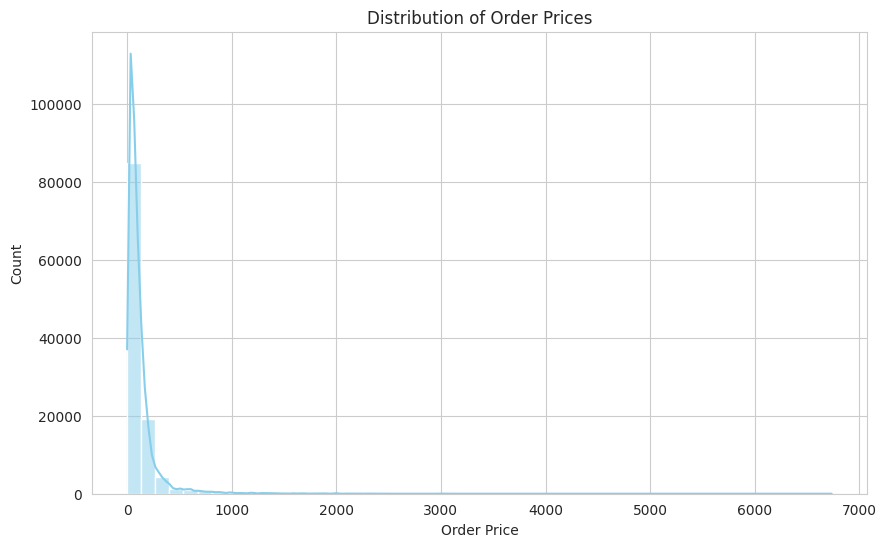

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(order_items['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Order Prices")
plt.xlabel("Order Price")
plt.ylabel("Count")
plt.show()

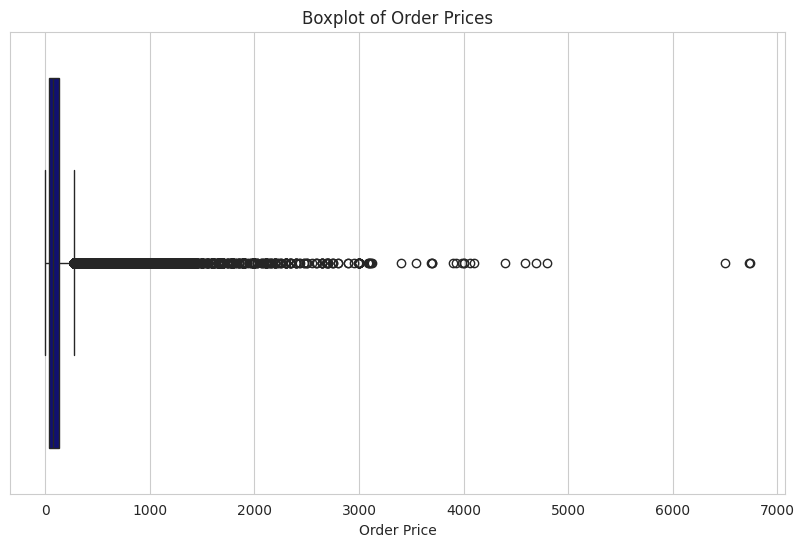

In [24]:
# Boxplot for outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=order_items['price'], color='navy')
plt.title("Boxplot of Order Prices")
plt.xlabel("Order Price")
plt.show()

# **2. Freight Value Distribution**

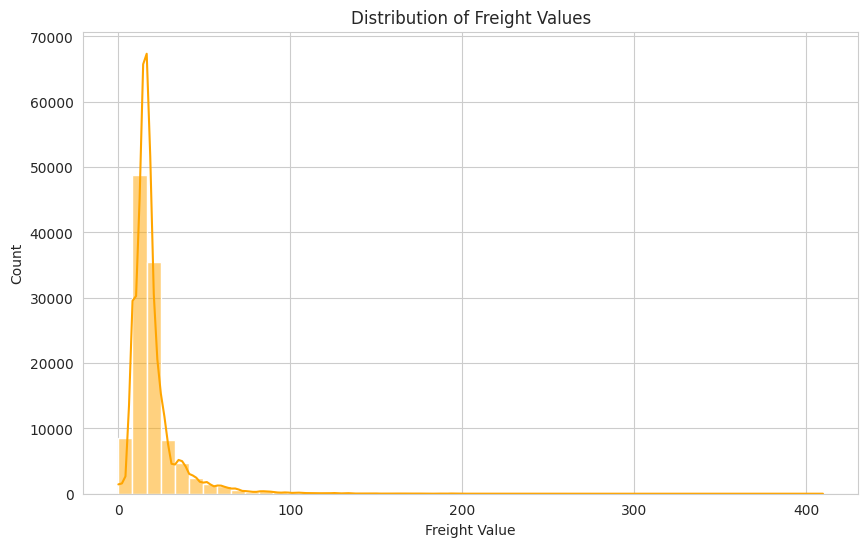

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(order_items['freight_value'], bins=50, kde=True, color='orange')
plt.title("Distribution of Freight Values")
plt.xlabel("Freight Value")
plt.ylabel("Count")
plt.show()

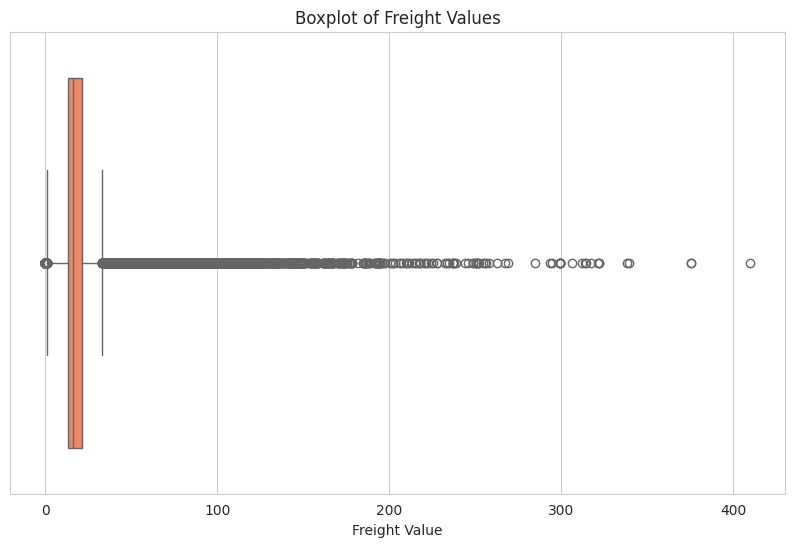

In [25]:
# Box Plot for Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=order_items['freight_value'], color='coral')
plt.title("Boxplot of Freight Values")
plt.xlabel("Freight Value")
plt.show()

**3. Review Scores**

/tmp/ipython-input-3281815945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=reviews['review_score'], palette='viridis')


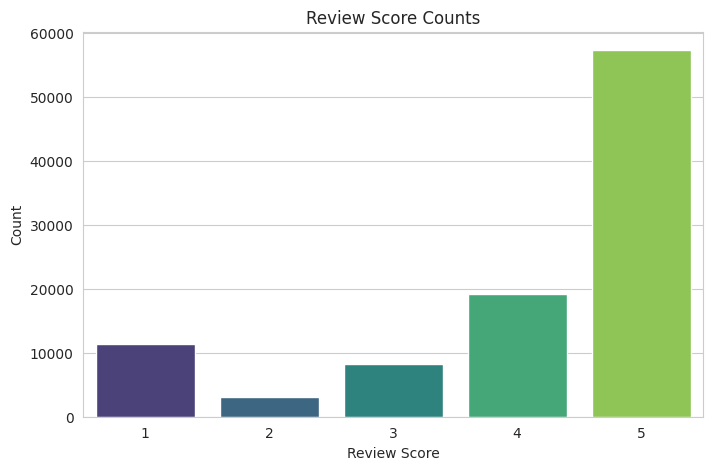

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x=reviews['review_score'], palette='viridis')
plt.title("Review Score Counts")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

**4. Payment Methods**

/tmp/ipython-input-2078205328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=payments['payment_type'], palette='pastel', order=payments['payment_type'].value_counts().index)


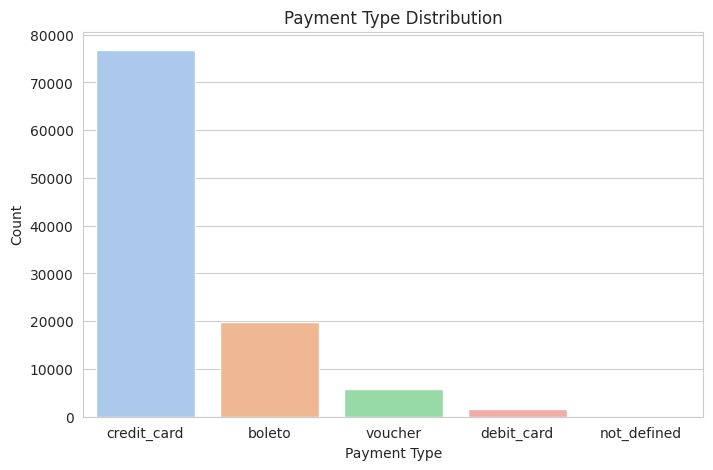

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=payments['payment_type'], palette='pastel', order=payments['payment_type'].value_counts().index)
plt.title("Payment Type Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

**5. Product Category Counts**

/tmp/ipython-input-1434066626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')


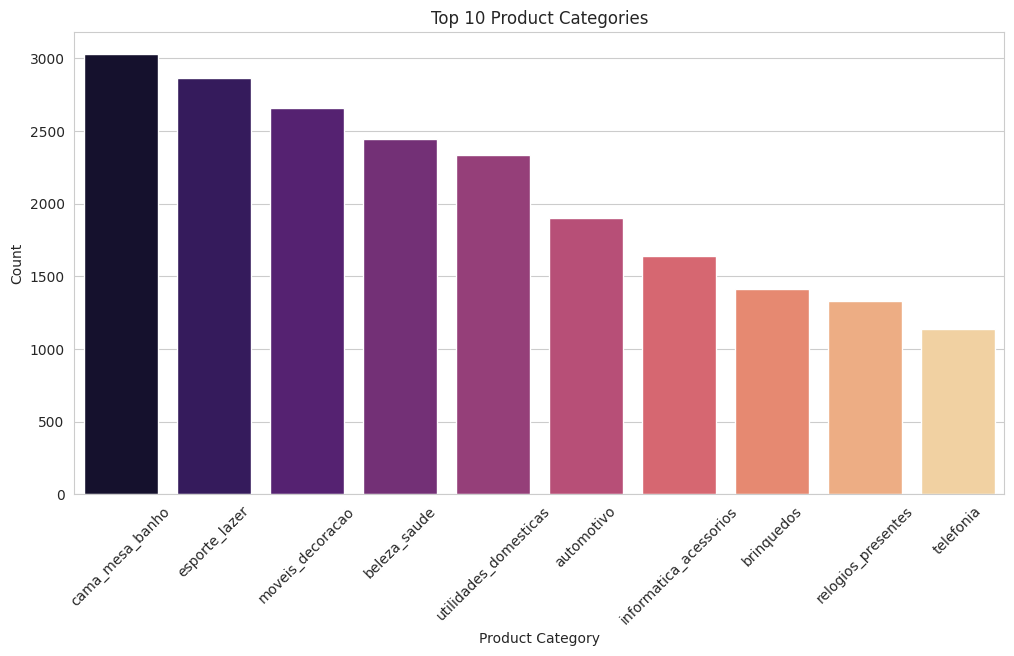

In [28]:
plt.figure(figsize=(12,6))
top_categories = products['product_category_name'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

# **Bivariate & Multivariate Analysis**

**1. Price vs Review Score**

/tmp/ipython-input-1223875358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=reviews['review_score'], y=order_items['price'], palette='coolwarm')


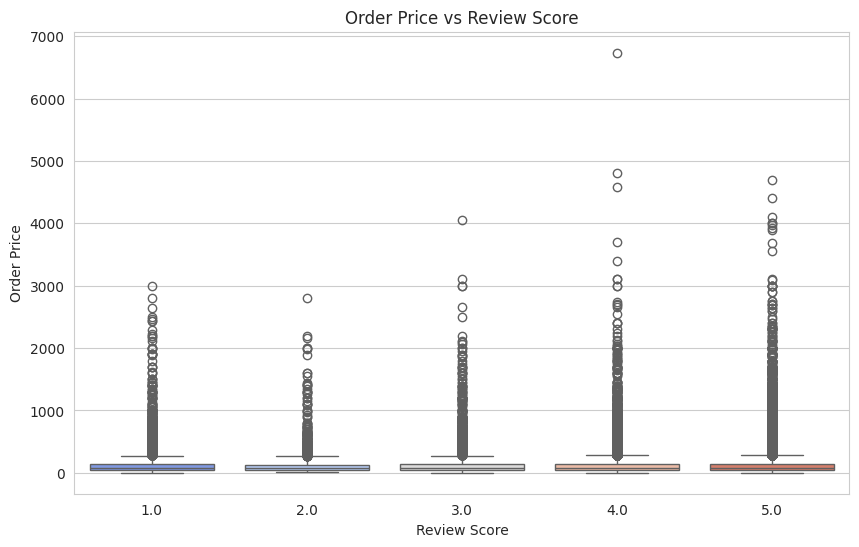

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=reviews['review_score'], y=order_items['price'], palette='coolwarm')
plt.title("Order Price vs Review Score")
plt.xlabel("Review Score")
plt.ylabel("Order Price")
plt.show()

**2. Delivery Delay vs Review Score**

/tmp/ipython-input-3156582720.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_delay_days', data=orders_reviews, palette='Set2')


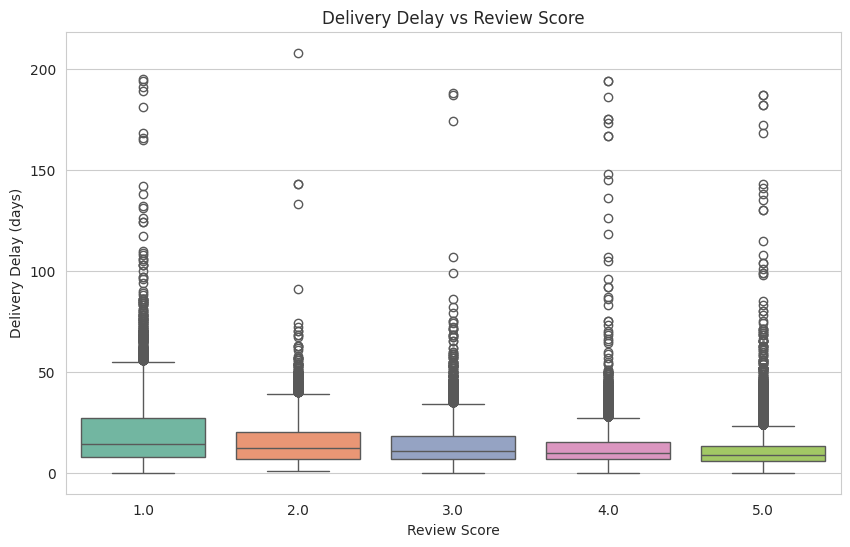

In [30]:
# Merge orders and order_items for delivery analysis
orders_items = pd.merge(order_items, orders, on='order_id', how='left')

# Convert dates to datetime
orders_items['order_delivered_customer_date'] = pd.to_datetime(orders_items['order_delivered_customer_date'])
orders_items['order_purchase_timestamp'] = pd.to_datetime(orders_items['order_purchase_timestamp'])

# Delivery delay in days
orders_items['delivery_delay_days'] = (orders_items['order_delivered_customer_date'] - orders_items['order_purchase_timestamp']).dt.days

# Merge with reviews
orders_reviews = pd.merge(orders_items, reviews[['order_id', 'review_score']], on='order_id', how='left')

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_delay_days', data=orders_reviews, palette='Set2')
plt.title("Delivery Delay vs Review Score")
plt.xlabel("Review Score")
plt.ylabel("Delivery Delay (days)")
plt.show()


**3. Payment Type vs Order Value**

/tmp/ipython-input-2070164341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='price', data=orders_payments, palette='pastel')


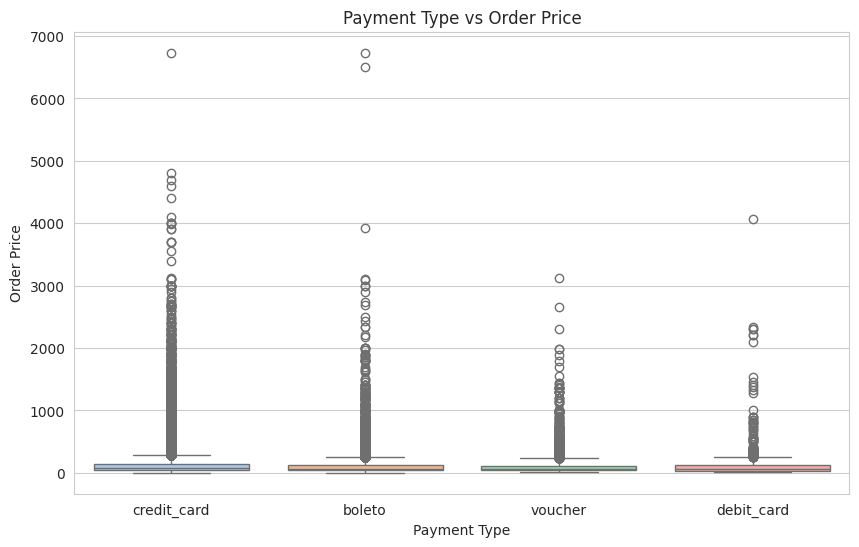

In [31]:
orders_payments = pd.merge(order_items, payments, on='order_id', how='left')

plt.figure(figsize=(10,6))
sns.boxplot(x='payment_type', y='price', data=orders_payments, palette='pastel')
plt.title("Payment Type vs Order Price")
plt.xlabel("Payment Type")
plt.ylabel("Order Price")
plt.show()


**4. Product Category vs Revenue**

/tmp/ipython-input-1331998446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')


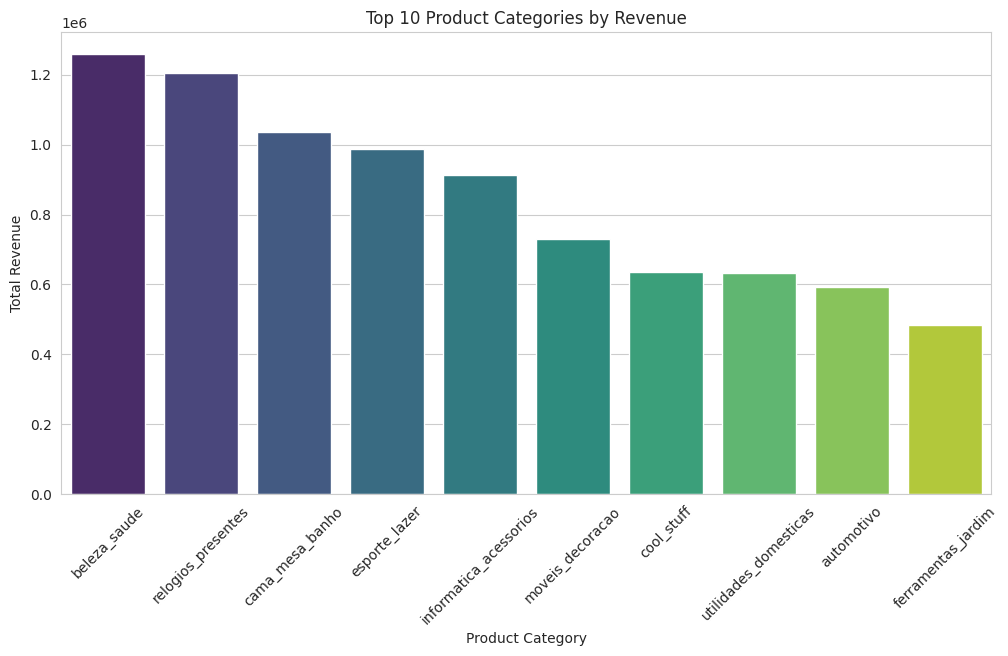

In [32]:
# Revenue per product category
category_revenue = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
category_revenue = category_revenue.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()


**5. Correlation Matrix (Numeric Features)**

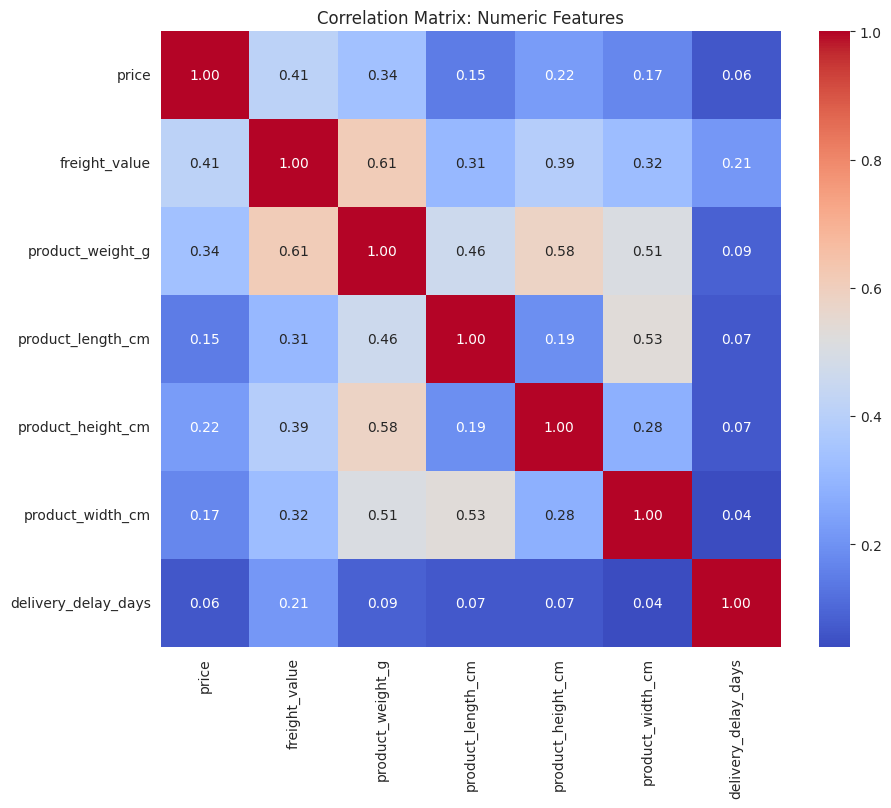

In [34]:
# Merge product info into orders_reviews
orders_reviews_products = pd.merge(
    orders_reviews,
    products[['product_id', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']],
    on='product_id',
    how='left'
)

# Now select numeric columns
numeric_cols = ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'delivery_delay_days']

# Compute correlation matrix
corr = orders_reviews_products[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Numeric Features")
plt.show()



# **Time-Based Analysis**

**1. Convert Dates to Datetime**

In [35]:
# Ensure all date columns are datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


**2. Order per Month**

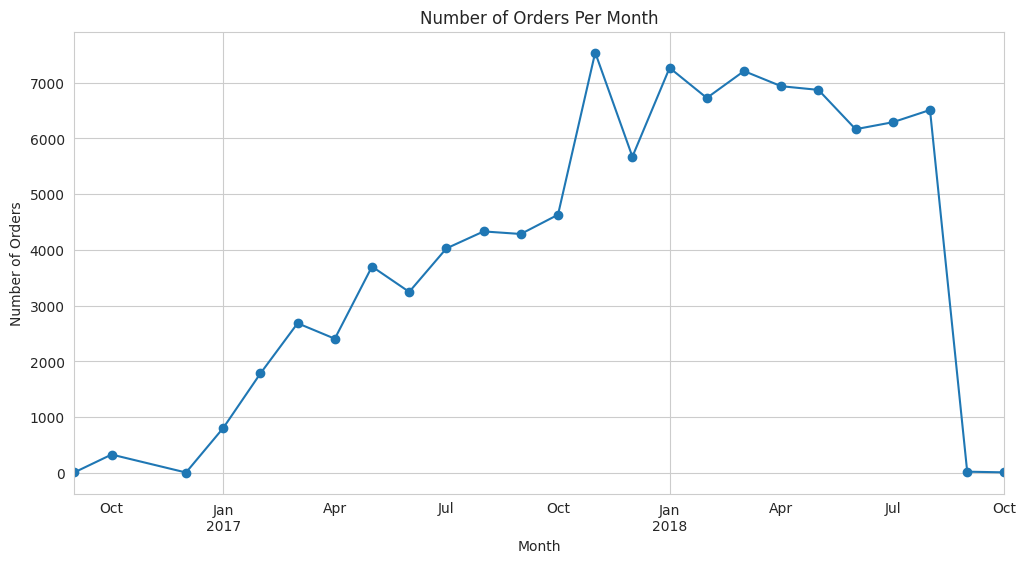

In [36]:
# Extract month-year
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Orders per month
orders_per_month = orders.groupby('order_month').size()

plt.figure(figsize=(12,6))
orders_per_month.plot(marker='o')
plt.title("Number of Orders Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


**3. Revenue Per Month**

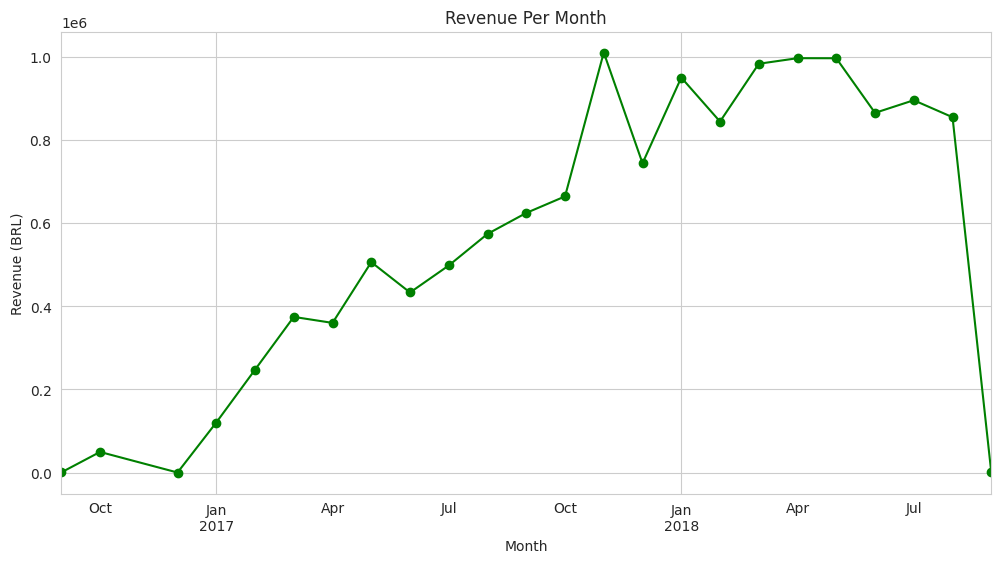

In [37]:
# Merge orders with order_items for revenue
orders_items_merged = pd.merge(order_items, orders[['order_id','order_month']], on='order_id', how='left')

revenue_per_month = orders_items_merged.groupby('order_month')['price'].sum()

plt.figure(figsize=(12,6))
revenue_per_month.plot(marker='o', color='green')
plt.title("Revenue Per Month")
plt.xlabel("Month")
plt.ylabel("Revenue (BRL)")
plt.grid(True)
plt.show()


**4. Average Delivery Delay Over Time**

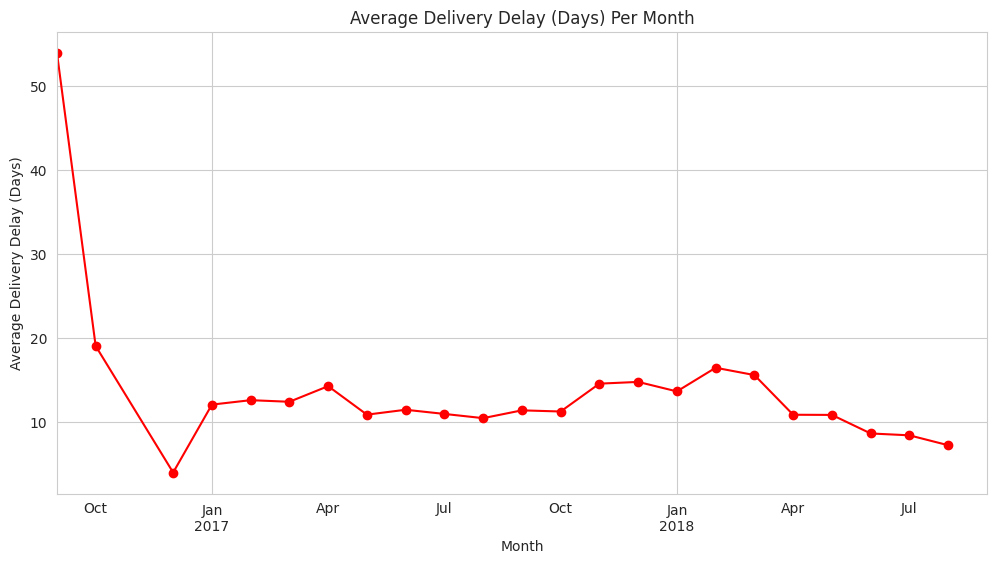

In [38]:
# Delivery delay in days
orders_items_merged = pd.merge(
    orders_items_merged,
    orders[['order_id','order_delivered_customer_date','order_purchase_timestamp']],
    on='order_id', how='left'
)
orders_items_merged['delivery_delay_days'] = (orders_items_merged['order_delivered_customer_date'] - orders_items_merged['order_purchase_timestamp']).dt.days

# Average delivery delay per month
avg_delivery_delay = orders_items_merged.groupby('order_month')['delivery_delay_days'].mean()

plt.figure(figsize=(12,6))
avg_delivery_delay.plot(marker='o', color='red')
plt.title("Average Delivery Delay (Days) Per Month")
plt.xlabel("Month")
plt.ylabel("Average Delivery Delay (Days)")
plt.grid(True)
plt.show()


**5. Orders vs Revenue vs Delay (Combined)**

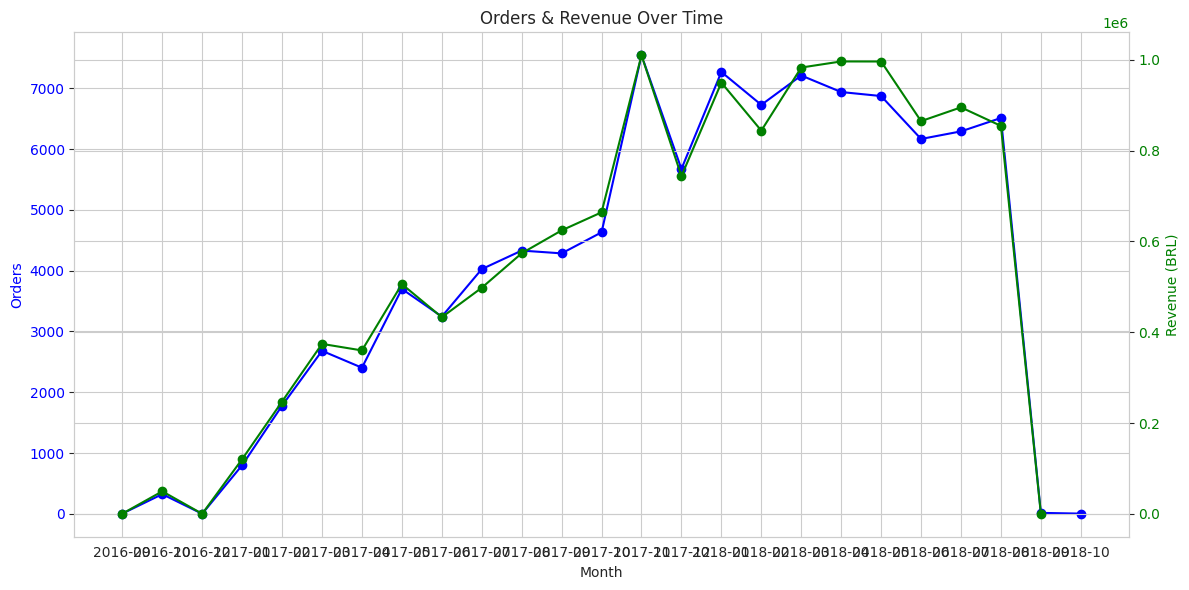

In [39]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Orders', color='blue')
ax1.plot(orders_per_month.index.astype(str), orders_per_month.values, color='blue', marker='o', label='Orders')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue (BRL)', color='green')
ax2.plot(revenue_per_month.index.astype(str), revenue_per_month.values, color='green', marker='o', label='Revenue')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Orders & Revenue Over Time")
fig.tight_layout()
plt.show()


# **Customer & Product Insights**

# **1. Repeat vs One-Time Buyers**

/tmp/ipython-input-3899784317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='buyer_type', data=customer_orders, palette='Set2')


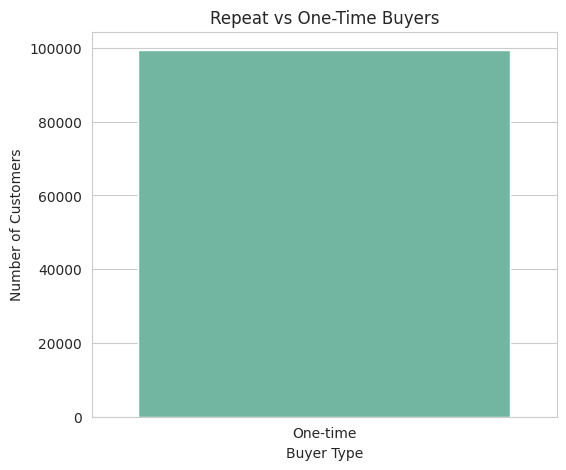

In [40]:
# Count orders per customer
customer_orders = orders.groupby('customer_id').size().reset_index(name='order_count')

# Classify
customer_orders['buyer_type'] = customer_orders['order_count'].apply(lambda x: 'Repeat' if x > 1 else 'One-time')

# Plot
plt.figure(figsize=(6,5))
sns.countplot(x='buyer_type', data=customer_orders, palette='Set2')
plt.title("Repeat vs One-Time Buyers")
plt.xlabel("Buyer Type")
plt.ylabel("Number of Customers")
plt.show()


**2. Top Product Categories by Revenue**

/tmp/ipython-input-1923813168.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')


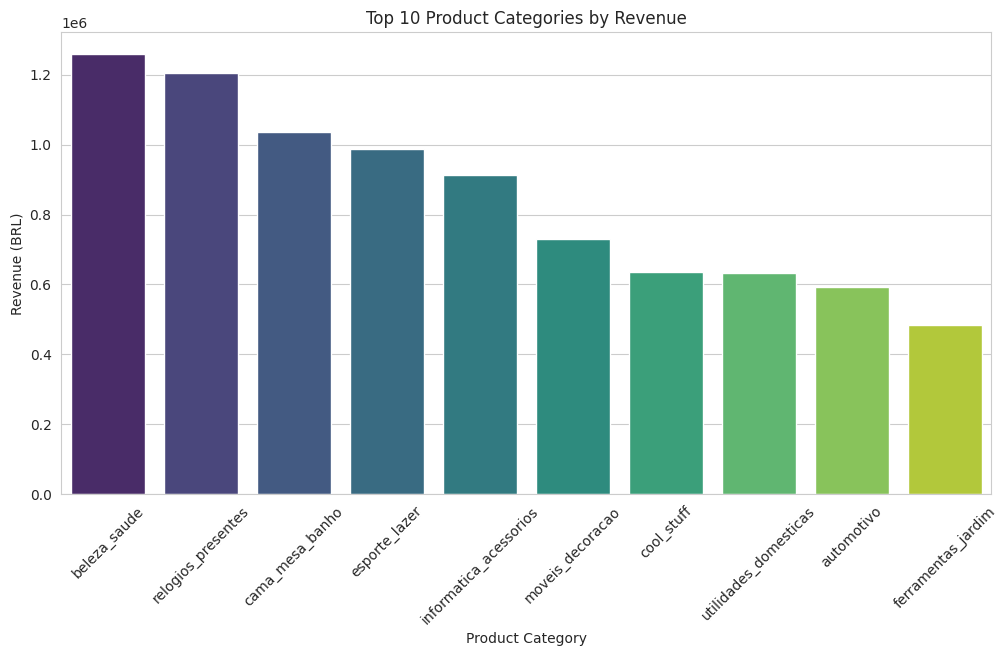

In [41]:
# Merge order_items with products
orders_products = pd.merge(order_items, products[['product_id','product_category_name']], on='product_id', how='left')

# Revenue per category
category_revenue = orders_products.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue (BRL)")
plt.show()


**3. High-Return / Low-Review Products**

/tmp/ipython-input-1169525108.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='coolwarm')


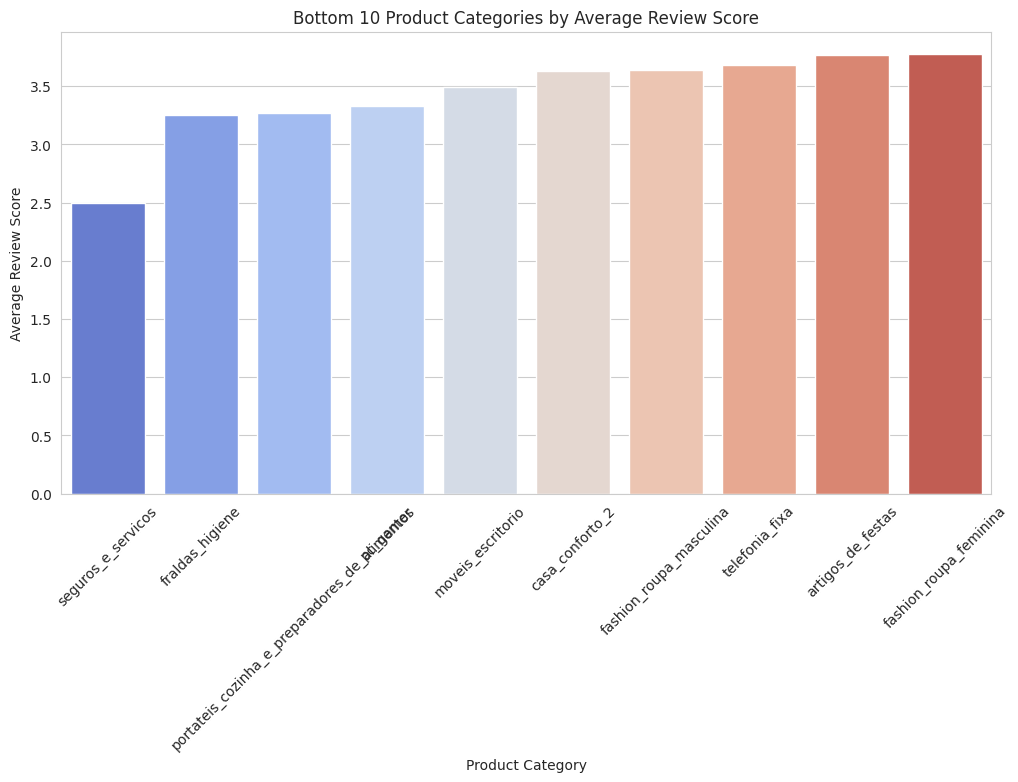

In [45]:
# Merge order_items + products
orders_products = pd.merge(order_items, products[['product_id','product_category_name']], on='product_id', how='left')

# Merge with reviews to get review_score
orders_products_reviews = pd.merge(
    orders_products,
    reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# Now compute average review score by product category
category_reviews = orders_products_reviews.groupby('product_category_name')['review_score'].mean().sort_values()

# Plot bottom 10 categories
plt.figure(figsize=(12,6))
sns.barplot(x=category_reviews.head(10).index, y=category_reviews.head(10).values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Bottom 10 Product Categories by Average Review Score")
plt.xlabel("Product Category")
plt.ylabel("Average Review Score")
plt.show()



**4. Geographic Distribution of Customers**

/tmp/ipython-input-3724736535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='magma')


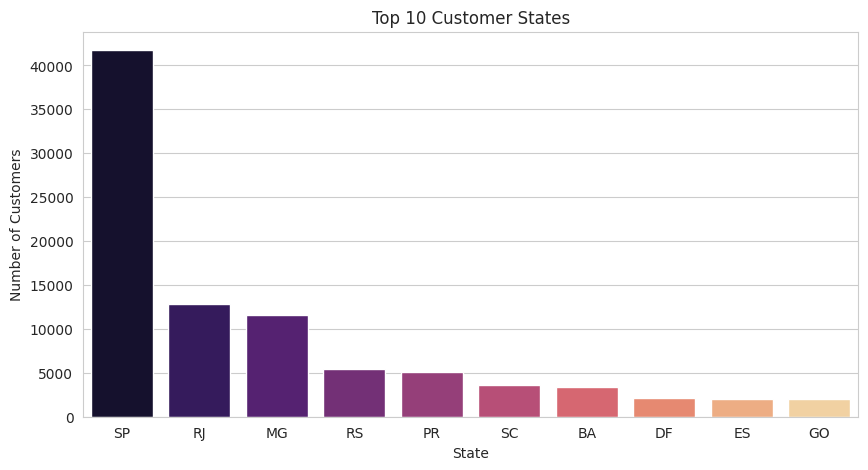

In [43]:
# Top 10 states by number of customers
top_states = customers['customer_state'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='magma')
plt.title("Top 10 Customer States")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()


**5. Revenue by Buyer Type**

/tmp/ipython-input-2184012265.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_buyer.index, y=revenue_by_buyer.values, palette='Set1')


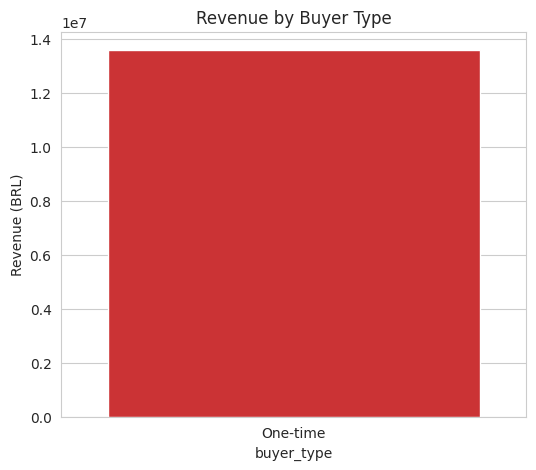

In [44]:
# Merge customer_orders with revenue
orders_customers = pd.merge(orders, customer_orders[['customer_id','buyer_type']], on='customer_id', how='left')
orders_items_customers = pd.merge(order_items, orders_customers[['order_id','buyer_type']], on='order_id', how='left')

revenue_by_buyer = orders_items_customers.groupby('buyer_type')['price'].sum()

plt.figure(figsize=(6,5))
sns.barplot(x=revenue_by_buyer.index, y=revenue_by_buyer.values, palette='Set1')
plt.title("Revenue by Buyer Type")
plt.ylabel("Revenue (BRL)")
plt.show()
